# Building Logistic Regression Model

In [1]:
#import the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the Data
iris_data = load_iris()
features = iris_data.data 
target = iris_data.target

feature_names = iris_data.feature_names
target_names = iris_data.target_names

In [3]:
#manipulate the data
df_iris = pd.DataFrame(features, columns=feature_names)
df_iris.rename(columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width"
    }, inplace=True)
df_iris["class"] = target
df_iris["flower"] = df_iris["class"].map(lambda val: target_names[val])

In [4]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


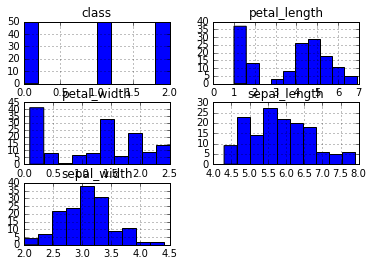

In [5]:
df_iris.hist()
plt.show()

In [6]:
#split the data into training and test data randomly
iris_train, iris_test = train_test_split(df_iris, test_size = 0.3, random_state = 10)

In [7]:
print(df_iris.shape)
print(iris_train.shape)
print(iris_test.shape)

(150, 6)
(105, 6)
(45, 6)


In [8]:
iris_train["flower"].unique().tolist()

['setosa', 'versicolor', 'virginica']

In [9]:
#Create a unique list of classes
unique_targets = iris_train["flower"].unique().tolist()
models = {}

### Let's build Logistic Regression models using one against all approach

In [10]:
#Build Models
for elem in unique_targets:
    lr = LogisticRegression()
    lr.fit(iris_train[["sepal_length", "sepal_width", "petal_length", "petal_width"]], iris_train["flower"] == elem)
    models[elem] = lr

In [11]:
models

{'setosa': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'versicolor': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'virginica': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)}

In [12]:
#Create an empty data frame
testing_probs = pd.DataFrame(columns=unique_targets)

In [13]:
#Calculate the probabilities for the same data using the models built
for elem in unique_targets:
    lr = models[elem]
    ls = lr.predict_proba(iris_test[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
    testing_probs[elem] = ls[:,1]

In [14]:
testing_probs.head()

,setosa,versicolor,virginica
0,0.008364,0.694099,0.254298
1,0.001316,0.457835,0.820540
2,0.980488,0.122672,0.000044
3,0.012282,0.340339,0.282379
4,0.968686,0.175824,0.000105


In [15]:
#pick the class with high
predicted_value = testing_probs.idxmax(axis = 1)

In [16]:
iris_test[iris_test["flower"] != predicted_value]

,sepal_length,sepal_width,petal_length,petal_width,class,flower
55,5.7,2.8,4.5,1.3,1,versicolor
66,5.6,3.0,4.5,1.5,1,versicolor
85,6.0,3.4,4.5,1.6,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor


In [17]:
accuracy_score(iris_test["flower"], predicted_value)

0.88888888888888884

In [18]:
confusion_matrix(iris_test["flower"], predicted_value)

array([[14,  0,  0],
       [ 0, 12,  5],
       [ 0,  0, 14]])

### Let's predict the value for one set of inputs

In [19]:
l = [5.1,3.5,1.4,0.2]
a = np.array([l])
testing_prob = pd.DataFrame(columns=unique_targets)

In [20]:
for elem in unique_targets:
    lr = models[elem]
    ls = lr.predict_proba(a)
    testing_prob[elem] = ls[:,1]

In [21]:
testing_prob.idxmax(axis = 1)[0]

'setosa'

## Save the model and the required python objects to use in API

In [22]:
import pickle 

In [23]:
filehandler = open("models.obj", "wb")
pickle.dump(models, filehandler)

In [26]:
filehandler = open("uniquetargets.obj", "wb")
pickle.dump(unique_targets, filehandler)

In [27]:
fl = open("uniquetargets.obj",'r')
object_file = pickle.load(fl)